# LAB: LDA

In [13]:
import time, seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import roc_curve, auc
from imblearn.over_sampling import RandomOverSampler

# DATA PREPARATION

In [1]:
df = pd.read_csv('./loan_data.csv')
df = df.drop(columns=["Loan_ID"])
df

NameError: name 'pd' is not defined

In [4]:
# from lazypredict.Supervised import LazyClassifier

# X = df.drop('Loan_Status', axis=1)
# y = df['Loan_Status']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ros = RandomOverSampler(random_state=0)
# X_train, y_train = ros.fit_resample(X_train, y_train)

# clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
# models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# models


# EDA

In [15]:
df.shape

(381, 13)

In [16]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [17]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [18]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,381.000000,381.000000,381.000000,370.000000,351.000000
mean,3579.845144,1277.275381,104.986877,340.864865,0.837607
std,1419.813818,2340.818114,28.358464,68.549257,0.369338
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2600.000000,0.000000,90.000000,360.000000,1.000000
50%,3333.000000,983.000000,110.000000,360.000000,1.000000
75%,4288.000000,2016.000000,127.000000,360.000000,1.000000
max,9703.000000,33837.000000,150.000000,480.000000,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             376 non-null    object 
 1   Married            381 non-null    object 
 2   Dependents         373 non-null    object 
 3   Education          381 non-null    object 
 4   Self_Employed      360 non-null    object 
 5   ApplicantIncome    381 non-null    int64  
 6   CoapplicantIncome  381 non-null    float64
 7   LoanAmount         381 non-null    float64
 8   Loan_Amount_Term   370 non-null    float64
 9   Credit_History     351 non-null    float64
 10  Property_Area      381 non-null    object 
 11  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 35.8+ KB


In [19]:
df.isna().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
df.dropna(inplace=True)
df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

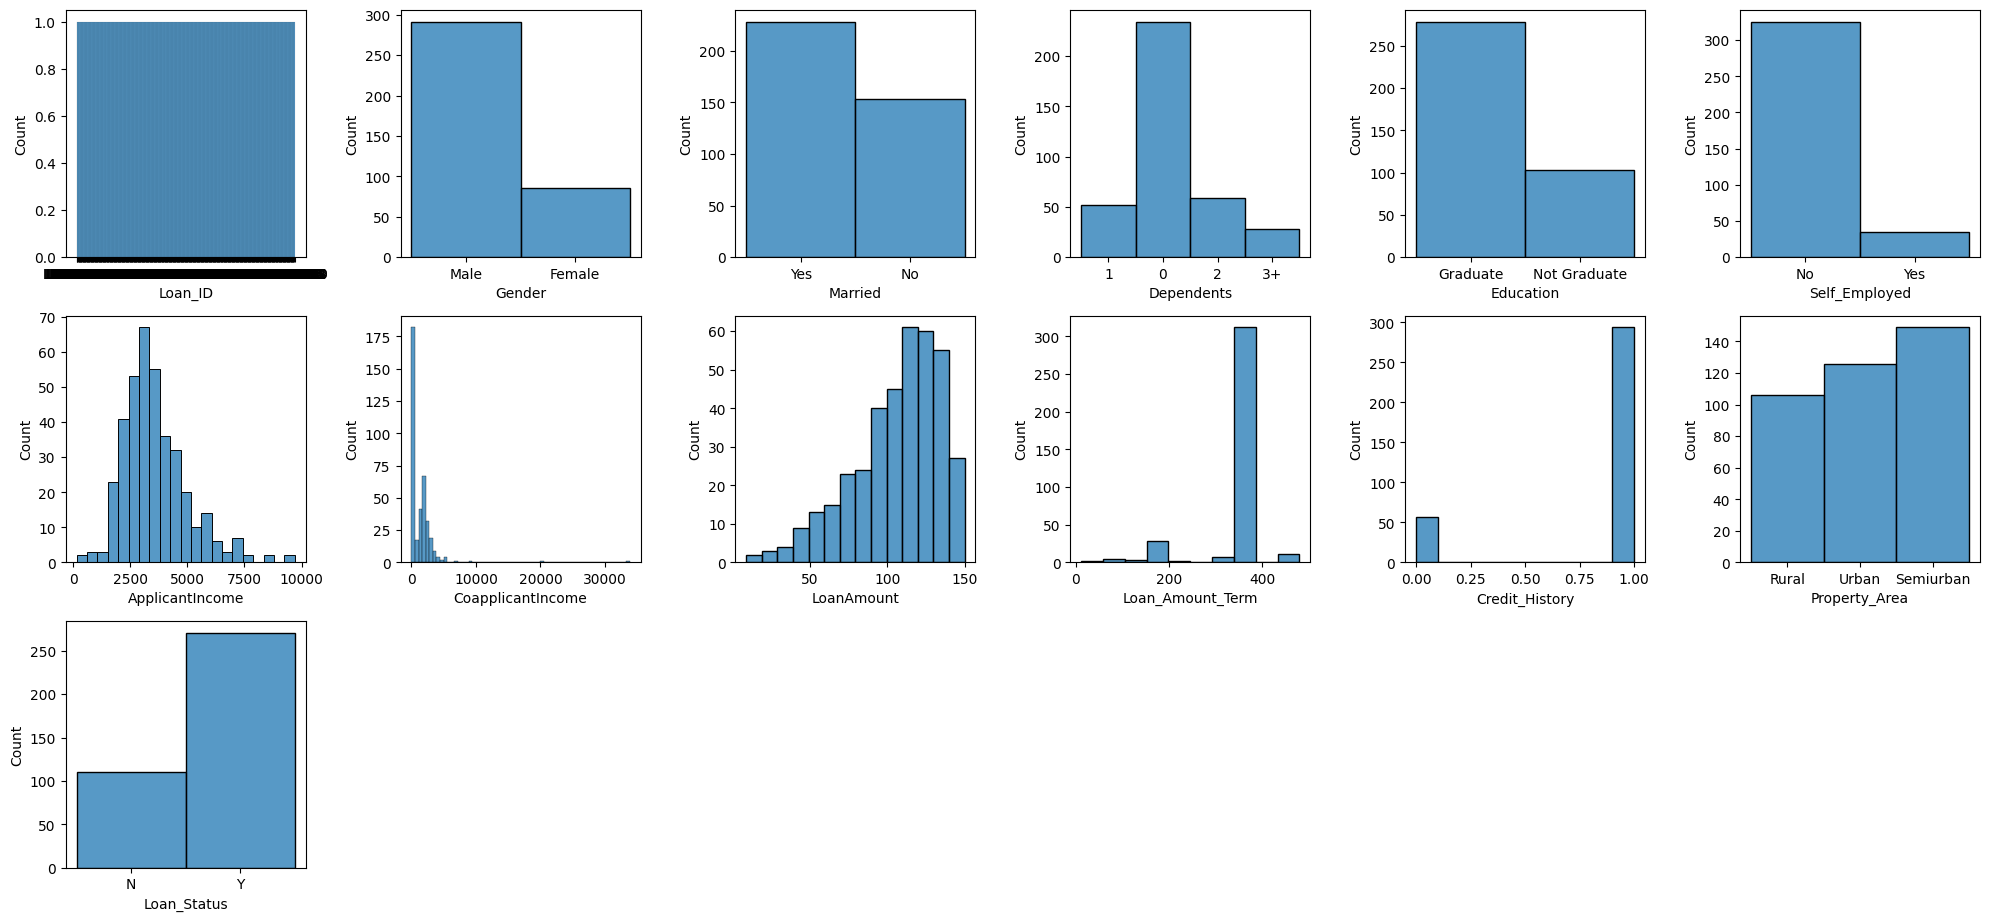

In [20]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in df:
    if plotnumber <= 30:
        ax = plt.subplot(5, 6, plotnumber)
        sns.histplot(df[column])
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

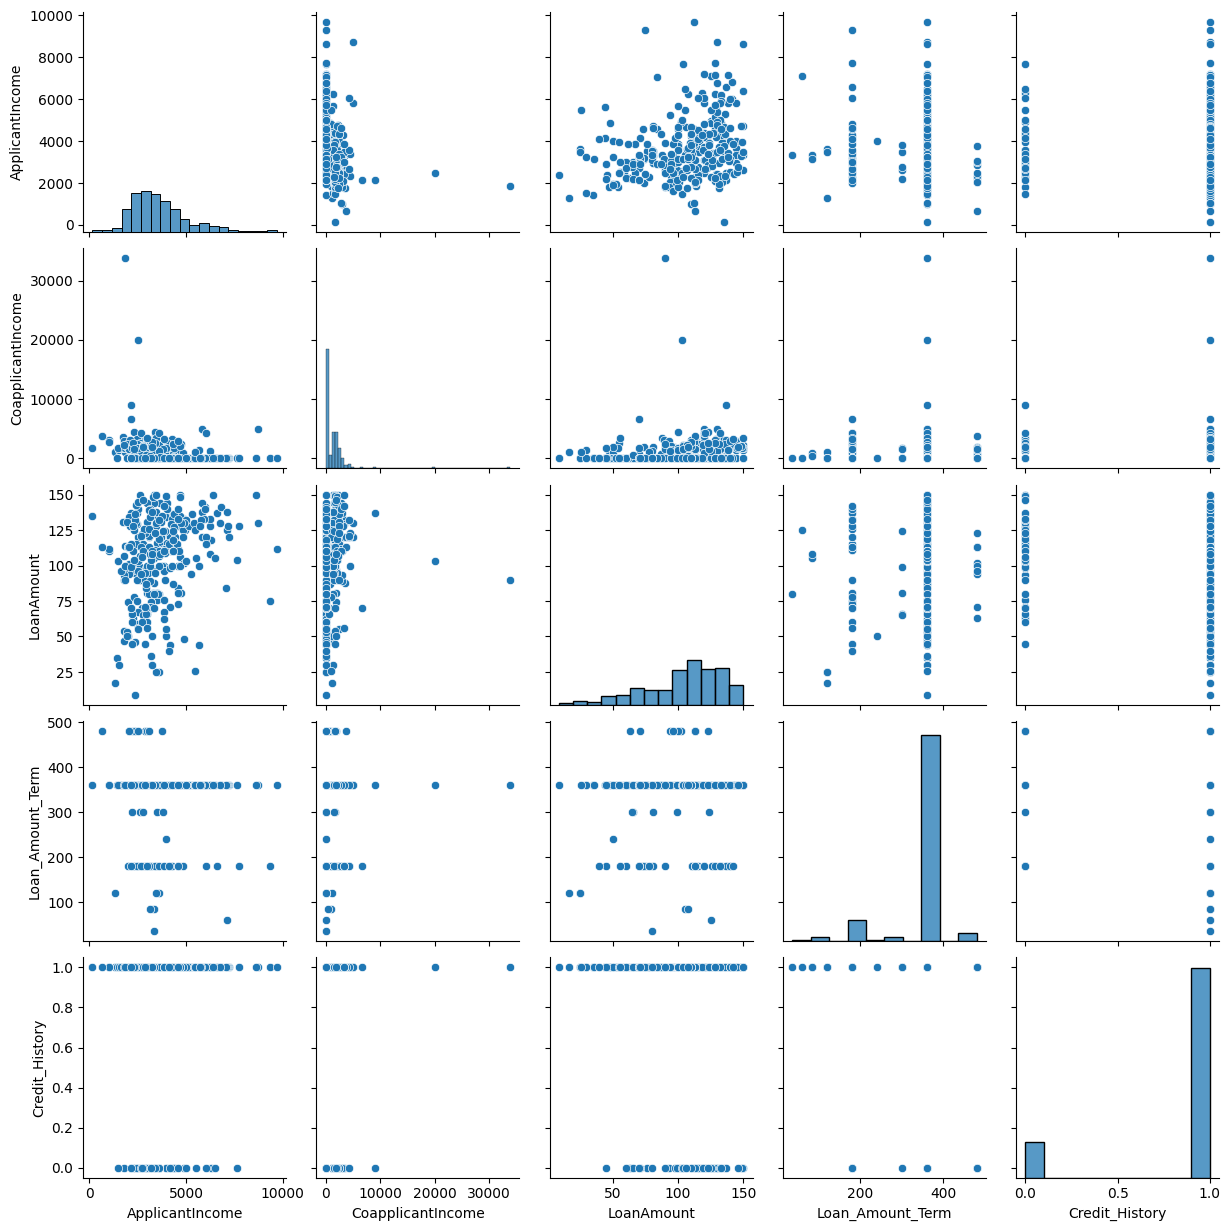

In [414]:
sns.pairplot(df)

# MODELING

## Preprocessing

In [415]:
x = df.drop('Loan_Status',axis=1)
y = df['Loan_Status']

In [416]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in x.columns:
    x[col] = label_encoder.fit_transform(x[col])
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,1,0,0,209,42,74,7,1,0
1,1,1,0,0,1,98,0,23,7,1,2
2,1,1,0,1,0,66,108,66,7,1,2
3,1,0,0,0,0,245,0,87,7,1,2
4,1,1,0,1,0,49,43,41,7,1,2


In [417]:
y.unique()

array(['N', 'Y'], dtype=object)

In [418]:
mapper_loan={'N':0,'Y':1}
y=y.map(mapper_loan)
y.head() 

0    0
1    1
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

In [425]:
X_train , X_test , y_train , y_test = train_test_split (x,y,test_size = .15 ,shuffle = True , random_state =42)

In [426]:
ros = RandomOverSampler(random_state=10)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

In [427]:
print("x_train shape = ", X_train_resampled.shape)
print("y_train shape = ", y_train_resampled.shape)
print("x_test shape = ", X_test.shape)
print("y_test shape = ", y_test.shape)

x_train shape =  (376, 11)
y_train shape =  (376,)
x_test shape =  (47, 11)
y_test shape =  (47,)


In [423]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_resampled)
X_test = scaler.fit_transform(X_test)

## Model

### Random Forest Approach

In [21]:
start_time = time.time()
logisticregression = LogisticRegression()
logisticregression.fit(X_train_resampled, y_train_resampled)
y_pred = logisticregression.predict_proba(x_test)
fpr_logisticregression, tpr_logisticregression, _ = roc_curve(y_test, y_pred[:, 1])
roc_auc_logisticregression = auc(fpr_logisticregression, tpr_logisticregression)
end_time = time.time()
print('Run Time:',end_time - start_time)
start_time = time.time()
lda = LinearDiscriminantAnalysis(n_components=1)
X_train_lda = lda.fit_transform(X_train_resampled, y_train_resampled)
X_test_lda = lda.transform(x_test)
logisticregression_lda = LogisticRegression()
logisticregression_lda.fit(X_train_lda, y_train_resampled)
y_pred = logisticregression_lda.predict_proba(X_test_lda)
fpr_logisticregression_lda, tpr_logisticregression_lda, _ = roc_curve(y_test, y_pred[:, 1])
roc_auc_logisticregression_lda = auc(fpr_logisticregression_lda, tpr_logisticregression_lda)
end_time = time.time()
print("Run Time", end_time - start_time)
plt.plot(fpr_logisticregression, tpr_logisticregression, label='logisticregression (AUC = %0.2f)' % roc_auc_logisticregression)
plt.plot(fpr_logisticregression_lda, tpr_logisticregression_lda, label='logisticregression with LDA (AUC = %0.2f)' % roc_auc_logisticregression_lda)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()